# Imports

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn import naive_bayes 
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import LSTM, TimeDistributed, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import soundfile as sf
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Data

**Click** Sound

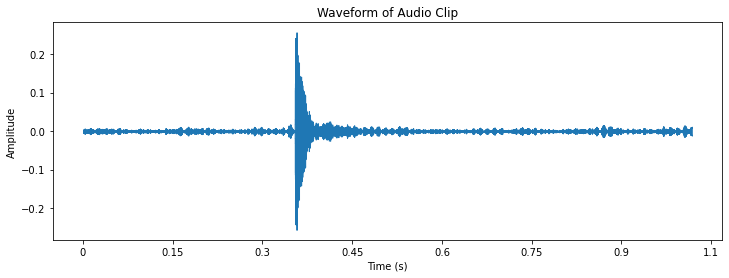

In [4]:
audio_clip, sr = librosa.load('sample_click.wav', sr=22050)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_clip, sr=sr)
plt.title('Waveform of Audio Clip')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

**Hihat** Sound

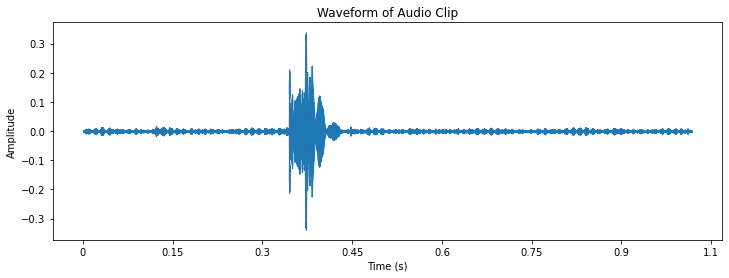

In [5]:
audio_clip, sr = librosa.load('sample_hihat.wav', sr=22050)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_clip, sr=sr)
plt.title('Waveform of Audio Clip')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

**Kick** Sound

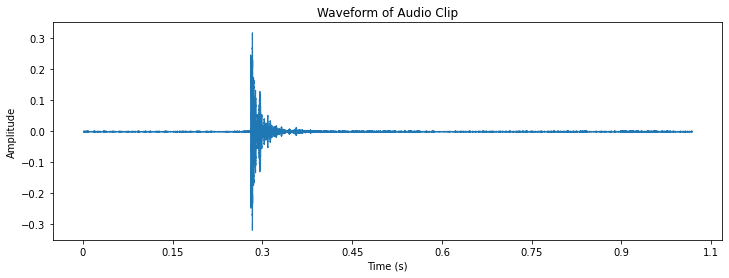

In [6]:
audio_clip, sr = librosa.load('sample_kick.wav', sr=22050)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_clip, sr=sr)
plt.title('Waveform of Audio Clip')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

**Pffsnare** Sound

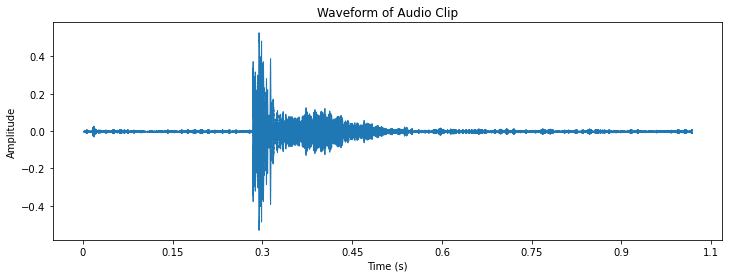

In [8]:
audio_clip, sr = librosa.load('sample_pffsnare.wav', sr=22050)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_clip, sr=sr)
plt.title('Waveform of Audio Clip')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

**Ksnare** Sound

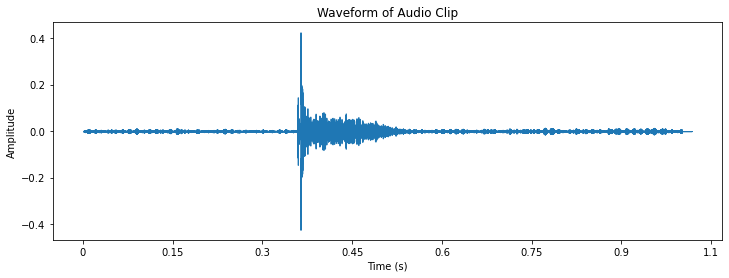

In [9]:
audio_clip, sr = librosa.load('sample_ksnare.wav', sr=22050)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_clip, sr=sr)
plt.title('Waveform of Audio Clip')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Data Augmentation

### Pitch Shifting

In [54]:
# Augment with pitch shifts of +2 and -2 semitones

input_directory = 'C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/pffsnare/'
output_directory = 'C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/'

num_original_clicks = 125
pitch_shift_steps = [2, -2]  

# Function to augment audio and save pitch-shifted files
def augment_and_save_audio(audio_path, output_directory, click_number, pitch_shift_step):
    audio_clip, sr = librosa.load(audio_path, sr=22050)
    pitch_shifted = librosa.effects.pitch_shift(y=audio_clip, sr=22050, n_steps=pitch_shift_step)
    output_filename = os.path.join(output_directory, f'pffsnare_{click_number}.wav')
    sf.write(output_filename, pitch_shifted, sr)
    print(f'Augmented audio saved as {output_filename}')

for click_number in range(1, num_original_clicks + 1):
    original_audio_path = os.path.join(input_directory, f'pffsnare_{click_number}.wav')
    augment_and_save_audio(original_audio_path, output_directory, click_number + num_original_clicks, 2)
    num_original_clicks += 1
    augment_and_save_audio(original_audio_path, output_directory, click_number + num_original_clicks, -2)

Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_126.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_127.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_128.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_129.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_130.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_131.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_132.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_133.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/

Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_199.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_200.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_201.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_202.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_203.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_204.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_205.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_206.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/

Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_272.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_273.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_274.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_275.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_276.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_277.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_278.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_279.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/

Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_352.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_353.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_354.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_355.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_356.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_357.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_358.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/pffsnare_359.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/

### Gaussian Noise Addition

In [55]:
# Augment with gaussian noise

input_directory = 'C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/click/'
output_directory = 'C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/'

num_original_clicks = 375

# Function to augment audio and save noise-added files
def augment_and_save_audio(audio_path, output_directory, click_number, noise_factor):
    audio_clip, sr = librosa.load(audio_path, sr=22050)
    pitch_shifted = audio_clip + noise_factor * np.random.randn(len(audio_clip))
    output_filename = os.path.join(output_directory, f'click_{click_number}.wav')
    sf.write(output_filename, pitch_shifted, sr)
    print(f'Augmented audio saved as {output_filename}')

for click_number in range(1, num_original_clicks + 1):
    original_audio_path = os.path.join(input_directory, f'click_{click_number}.wav')
    augment_and_save_audio(original_audio_path, output_directory, click_number + num_original_clicks, 0.005)
    num_original_clicks += 1
    augment_and_save_audio(original_audio_path, output_directory, click_number + num_original_clicks, 0.0025)

Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_376.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_377.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_378.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_379.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_380.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_381.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_382.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_383.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_384.wav
Augmented 

Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_464.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_465.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_466.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_467.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_468.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_469.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_470.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_471.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_472.wav
Augmented 

Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_543.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_544.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_545.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_546.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_547.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_548.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_549.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_550.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_551.wav
Augmented 

Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_629.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_630.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_631.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_632.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_633.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_634.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_635.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_636.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_637.wav
Augmented 

Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_715.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_716.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_717.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_718.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_719.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_720.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_721.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_722.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_723.wav
Augmented 

Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_799.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_800.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_801.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_802.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_803.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_804.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_805.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_806.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_807.wav
Augmented 

Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_889.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_890.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_891.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_892.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_893.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_894.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_895.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_896.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_897.wav
Augmented 

Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_972.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_973.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_974.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_975.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_976.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_977.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_978.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_979.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_980.wav
Augmented 

Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_1053.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_1054.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_1055.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_1056.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_1057.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_1058.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_1059.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_1060.wav
Augmented audio saved as C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/click_1061.wav
A

# Feature Data Frame

In [3]:
path = "C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/"

# Dictionary to map labels to numerical values
dict_lbl = {'ksnare': 0, 'click': 1, 'hihat': 2, 'kick': 3, 'pffsnare': 4}

# Initialize an empty dataframe to store features
music = pd.DataFrame(columns=['Name', 'zero_crossing_rate', 'chroma_stft_mean', 'chroma_stft_var',
                              'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean',
                              'spectral_bandwidth_var', 'spectral_rolloff_mean', 'spectral_rolloff_var',
                              'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var',
                              'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var',
                              'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var',
                              'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var',
                              'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
                              'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var',
                              'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label'])

# Iterate through each label directory and process audio files
for label in dict_lbl.keys():
    label_path = os.path.join(path, label)
    for audio_file in glob.glob(os.path.join(label_path, '*.wav')):
        signal, sr = librosa.load(audio_file, sr=22050)  # Loading the timeseries

        # Calculating zero crossing rate
        zcr = librosa.feature.zero_crossing_rate(signal, frame_length=2048, hop_length=512)

        # Calculating chroma stft mean & chroma stft variance
        chroma_stft = librosa.feature.chroma_stft(y=signal, sr=sr)
        chroma_stft_mean = np.mean(chroma_stft)
        chroma_stft_var = np.var(chroma_stft)

        # Calculating spectral centroid mean & spectral centroid variance
        spec_cent = librosa.feature.spectral_centroid(y=signal, sr=sr)
        spec_cent_mean = np.mean(spec_cent)
        spec_cent_var = np.var(spec_cent)

        # Calculating spectral bandwidth mean & spectral bandwidth variance
        spec_bw = librosa.feature.spectral_bandwidth(y=signal, sr=sr)
        spec_bw_mean = np.mean(spec_bw)
        spec_bw_var = np.var(spec_bw)

        # Calculating spectral rolloff mean & spectral rolloff variance
        spec_ro = librosa.feature.spectral_rolloff(y=signal, sr=sr)
        spec_ro_mean = np.mean(spec_ro)
        spec_ro_var = np.var(spec_ro)

        # Calculating MFCC (Mel Frequency Cepstral Coefficients)
        mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=20)
        mfcc_mean = np.mean(mfcc, axis=1)
        mfcc_var = np.var(mfcc, axis=1)

        # Append features to the dataframe
        music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
                              'chroma_stft_mean': chroma_stft_mean, 'chroma_stft_var': chroma_stft_var,
                              'spectral_centroid_mean': spec_cent_mean, 'spectral_centroid_var': spec_cent_var,
                              'spectral_bandwidth_mean': spec_bw_mean, 'spectral_bandwidth_var': spec_bw_var,
                              'spectral_rolloff_mean': spec_ro_mean, 'spectral_rolloff_var': spec_ro_var,
                              'mfcc1_mean': mfcc_mean[0], 'mfcc1_var': mfcc_var[0], 'mfcc2_mean': mfcc_mean[1],
                              'mfcc2_var': mfcc_var[1], 'mfcc3_mean': mfcc_mean[2], 'mfcc3_var': mfcc_var[2],
                              'mfcc4_mean': mfcc_mean[3], 'mfcc4_var': mfcc_var[3], 'mfcc5_mean': mfcc_mean[4],
                              'mfcc5_var': mfcc_var[4], 'mfcc6_mean': mfcc_mean[5], 'mfcc6_var': mfcc_var[5],
                              'mfcc7_mean': mfcc_mean[6], 'mfcc7_var': mfcc_var[6], 'mfcc8_mean': mfcc_mean[7],
                              'mfcc8_var': mfcc_var[7], 'mfcc9_mean': mfcc_mean[8], 'mfcc9_var': mfcc_var[8],
                              'mfcc10_mean': mfcc_mean[9], 'mfcc10_var': mfcc_var[9], 'mfcc11_mean': mfcc_mean[10],
                              'mfcc11_var': mfcc_var[10], 'mfcc12_mean': mfcc_mean[11], 'mfcc12_var': mfcc_var[11],
                              'mfcc13_mean': mfcc_mean[12], 'mfcc13_var': mfcc_var[12], 'mfcc14_mean': mfcc_mean[13],
                              'mfcc14_var': mfcc_var[13], 'mfcc15_mean': mfcc_mean[14], 'mfcc15_var': mfcc_var[14],
                              'mfcc16_mean': mfcc_mean[15], 'mfcc16_var': mfcc_var[15], 'mfcc17_mean': mfcc_mean[16],
                              'mfcc17_var': mfcc_var[16], 'mfcc18_mean': mfcc_mean[17], 'mfcc18_var': mfcc_var[17],
                              'mfcc19_mean': mfcc_mean[18], 'mfcc19_var': mfcc_var[18], 'mfcc20_mean': mfcc_mean[19],
                              'mfcc20_var': mfcc_var[19], 'label': dict_lbl[label]}, ignore_index=True)


C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/",''), 'zero_crossing_rate': np.mean(zcr),
C:\Users\jsubh\AppData\Local\Temp\ipykernel_27320\344425833.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  music = music.append({'Name': audio_file.replace("C:/Users/jsubh/Desktop/Mas

In [6]:
# Sample feature dataframe

music.head(20)

,Name,zero_crossing_rate,chroma_stft_mean,chroma_stft_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_rolloff_mean,spectral_rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,ksnare\ksnare_1.wav,0.130718,0.413311,0.081142,2377.490436,403687.483296,2074.578519,82407.024991,4424.725932,890678.313421,...,20.336525,-0.034382,26.93891,-2.367531,30.889591,1.692203,37.176384,-1.504658,17.053099,0
1,ksnare\ksnare_10.wav,0.117739,0.414541,0.090335,2262.414936,189163.566508,2116.582966,181686.835521,4286.843971,246715.258388,...,47.01545,-5.406845,28.017412,-2.673274,12.438767,3.713467,60.089703,-1.368424,17.000639,0
2,ksnare\ksnare_100.wav,0.075605,0.568253,0.067791,1637.474734,253962.660574,1687.943987,33007.617908,3375.503245,510808.581986,...,24.44742,-1.269364,24.793444,1.830781,52.450741,7.072177,26.177877,1.327608,8.62279,0
3,ksnare\ksnare_1000.wav,0.35213,0.57443,0.099965,4750.526408,507285.576637,3145.051832,38249.222639,8679.617408,759603.881441,...,17.545151,2.101596,9.736879,0.614199,6.908303,4.014554,24.325998,3.377838,20.814066,0
4,ksnare\ksnare_1001.wav,0.278194,0.554259,0.10956,4326.607654,638584.532478,3103.48915,131220.94585,8228.462072,1477557.244432,...,28.491196,1.428244,17.695976,-0.803868,12.87625,4.609469,33.352379,5.013669,17.90967,0
5,ksnare\ksnare_1002.wav,0.349153,0.593161,0.087819,4731.814929,417039.047256,3068.692256,103524.220899,8473.31543,1265327.194852,...,6.957807,1.58042,9.558413,9.05112,83.295746,4.350604,24.356882,0.673107,16.091337,0
6,ksnare\ksnare_1003.wav,0.290905,0.568627,0.091879,4352.219808,411554.194965,2988.085348,220712.598629,7928.386467,1952294.893887,...,10.328582,1.334864,10.704794,10.837503,87.518356,5.666896,19.140078,1.485257,11.726213,0
7,ksnare\ksnare_1004.wav,0.349814,0.619962,0.088564,4673.759327,573472.710203,3103.032343,85327.81118,8504.573305,1401875.787335,...,11.941235,6.267439,25.713533,-1.614661,26.674679,-0.074911,12.331537,4.117363,10.709745,0
8,ksnare\ksnare_1005.wav,0.281597,0.56771,0.084556,4210.407323,677978.820827,3022.634474,222322.879729,7775.917496,2661693.84071,...,19.862236,6.315925,45.950127,-2.305035,23.329342,-0.996753,9.400602,3.59637,12.739856,0
9,ksnare\ksnare_1006.wav,0.355201,0.607447,0.087443,4694.654338,495600.870835,3136.049721,56578.811882,8601.820029,952709.953356,...,15.901256,-0.150708,14.974301,3.485523,15.777012,3.937025,17.324121,1.358649,12.768046,0


In [5]:
# Feature dataframe size

music.shape

(5625, 51)

We have a total of 5625 audio files, evenly divided into 5 classes.

# Classical Models

In [22]:
# Train test split. Keeping 20% test size.

X_train, X_test, y_train, y_test = train_test_split(music.drop(['Name','label'],axis=1), music['label'], test_size=0.20, random_state=42)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

Logistic Regression

In [23]:
pipeline_LogReg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))
pipeline_LogReg.fit(X_train, y_train)
pred_LogReg = pipeline_LogReg.predict(X_test)

accuracy = accuracy_score(y_test, pred_LogReg)
formatted_accuracy = "{:.2f}".format(accuracy * 100)  # Format accuracy to 2 decimal places
print(f'Test accuracy: {formatted_accuracy}%')

Test accuracy: 94.22%


SGD Classifier

In [24]:
pipeline_SGD = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, max_iter=500))
pipeline_SGD.fit(X_train, y_train)
pred_SGD = pipeline_SGD.predict(X_test)
accuracy = accuracy_score(y_test, pred_SGD)
formatted_accuracy = "{:.2f}".format(accuracy * 100)  # Format accuracy to 2 decimal places
print(f'Test accuracy: {formatted_accuracy}%')

Test accuracy: 93.69%


Support Vector Machine (Linear)

In [25]:
pipeline_SVC = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='linear', degree=3, gamma='auto'))
pipeline_SVC.fit(X_train, y_train)
pred_SVC = pipeline_SVC.predict(X_test)
accuracy = accuracy_score(y_test, pred_SVC)
formatted_accuracy = "{:.2f}".format(accuracy * 100)  # Format accuracy to 2 decimal places
print(f'Test accuracy: {formatted_accuracy}%')

Test accuracy: 95.02%


Support Vector Machine (Poly)

In [26]:
pipeline_SVC = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='poly', degree=3, gamma='auto'))
pipeline_SVC.fit(X_train, y_train)
pred_SVC = pipeline_SVC.predict(X_test)
accuracy = accuracy_score(y_test, pred_SVC)
formatted_accuracy = "{:.2f}".format(accuracy * 100)  # Format accuracy to 2 decimal places
print(f'Test accuracy: {formatted_accuracy}%')

Test accuracy: 93.69%


Random Forest

In [32]:
pipeline_RF = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=9))
pipeline_RF.fit(X_train, y_train)
pred_RF = pipeline_RF.predict(X_test)
accuracy = accuracy_score(y_test, pred_RF)
formatted_accuracy = "{:.2f}".format(accuracy * 100)  # Format accuracy to 2 decimal places
print(f'Test accuracy: {formatted_accuracy}%')

Test accuracy: 95.47%


Extra Tree Classifier

In [33]:
pipeline_ET = make_pipeline(StandardScaler(), ExtraTreeClassifier())
pipeline_ET.fit(X_train, y_train)
pred_ET = pipeline_ET.predict(X_test)
accuracy = accuracy_score(y_test, pred_ET)
formatted_accuracy = "{:.2f}".format(accuracy * 100)
print(f'Test accuracy: {formatted_accuracy}%')

Test accuracy: 84.62%


Ridge Classifier

In [108]:
pipeline_RC = make_pipeline(StandardScaler(), RidgeClassifier())
pipeline_RC.fit(X_train, y_train)
pred_RC = pipeline_RC.predict(X_test)
accuracy = accuracy_score(y_test, pred_RC)
formatted_accuracy = "{:.2f}".format(accuracy * 100)
print(f'Test accuracy: {formatted_accuracy}%')

Test accuracy: 90.84%


AdaBoost Classifier

In [109]:
pipeline_ADB = make_pipeline(StandardScaler(), AdaBoostClassifier(n_estimators=100))
pipeline_ADB.fit(X_train, y_train)
pred_ADB = pipeline_ADB.predict(X_test)
accuracy = accuracy_score(y_test, pred_ADB)
formatted_accuracy = "{:.2f}".format(accuracy * 100)
print(f'Test accuracy: {formatted_accuracy}%')

Test accuracy: 86.76%


Simple Neural Network

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# NN model
model = Sequential()
model.add(Dense(32, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Epoch 1/20
127/127 [==============================] - 1s 2ms/step - loss: 1.2256 - accuracy: 0.5452 - val_loss: 0.9015 - val_accuracy: 0.7600
Epoch 2/20
127/127 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.8193 - val_loss: 0.6078 - val_accuracy: 0.8289
Epoch 3/20
127/127 [==============================] - 0s 1ms/step - loss: 0.4593 - accuracy: 0.8711 - val_loss: 0.4841 - val_accuracy: 0.8667
Epoch 4/20
127/127 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.8980 - val_loss: 0.4116 - val_accuracy: 0.8733
Epoch 5/20
127/127 [==============================] - 0s 1ms/step - loss: 0.3038 - accuracy: 0.9123 - val_loss: 0.3579 - val_accuracy: 0.8844
Epoch 6/20
127/127 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.9230 - val_loss: 0.3209 - val_accuracy: 0.9000
Epoch 7/20
127/127 [==============================] - 0s 1ms/step - loss: 0.2308 - accuracy: 0.9321 - val_loss: 0.2891 - val_accuracy: 0.9089
Epoch 

# Mel Spectrograms

In [11]:
# Producing mel spectrograms of the audio data

import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import os

audio_directory = 'C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/pffsnare/'
output_directory = 'C:/Users/jsubh/Desktop/Masters/MDM/project/dataset/custom_dataset/temp/'

for audio_file in os.listdir(audio_directory):
    if audio_file.endswith('.wav'):
        audio_path = os.path.join(audio_directory, audio_file)
        y, sr = librosa.load(audio_path)
        mels = librosa.feature.melspectrogram(y=y, sr=sr)
        
        # Plot mel-spectrogram and save as image
        fig = plt.figure(figsize=(6, 4))
        plt.axis('off') 
        librosa.display.specshow(librosa.power_to_db(mels, ref=np.max))
        plt.tight_layout() 
        plt.savefig(os.path.join(output_directory, f'mel_{os.path.splitext(audio_file)[0]}.png'))
        plt.close(fig)

# Deep Learning Models

Convolutional Neural Network (CNN)

In [8]:
image_directories = [
    r'C:\Users\jsubh\Desktop\Masters\MDM\project\dataset\custom_dataset\click_mel',
    r'C:\Users\jsubh\Desktop\Masters\MDM\project\dataset\custom_dataset\hihat_mel',
    r'C:\Users\jsubh\Desktop\Masters\MDM\project\dataset\custom_dataset\ksnare_mel',
    r'C:\Users\jsubh\Desktop\Masters\MDM\project\dataset\custom_dataset\kick_mel',
    r'C:\Users\jsubh\Desktop\Masters\MDM\project\dataset\custom_dataset\pffsnare_mel',
]

num_classes = 5  
input_shape = (432, 288, 3)  # Input shape of the mel-spectrogram images
batch_size = 32
epochs = 20

# Load mel-spectrogram images and corresponding labels
X_2 = []
y_2 = []

for class_label, image_directory in enumerate(image_directories):
    for image_file in os.listdir(image_directory):
        image_path = os.path.join(image_directory, image_file)
        image = load_img(image_path, target_size=(input_shape[0], input_shape[1]))
        image_array = img_to_array(image)
        X_2.append(image_array)
        y_2.append(class_label)


In [9]:
# Convert lists to numpy arrays
X_2 = np.array(X_2)
y_2 = np.array(y_2)

# Convert class labels to categorical labels
y_categorical = to_categorical(y_2, num_classes=num_classes)

# Split the data into training and testing sets
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_categorical, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Train the model
model.fit(X_2_train, y_2_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
127/127 [==============================] - 223s 2s/step - loss: 3.8834 - accuracy: 0.6469 - val_loss: 0.3521 - val_accuracy: 0.9022
Epoch 2/20
127/127 [==============================] - 237s 2s/step - loss: 0.3945 - accuracy: 0.8719 - val_loss: 0.2349 - val_accuracy: 0.9156
Epoch 3/20
127/127 [==============================] - 228s 2s/step - loss: 0.2632 - accuracy: 0.9128 - val_loss: 0.1696 - val_accuracy: 0.9422
Epoch 4/20
127/127 [==============================] - 224s 2s/step - loss: 0.1926 - accuracy: 0.9388 - val_loss: 0.1777 - val_accuracy: 0.9356
Epoch 5/20
127/127 [==============================] - 229s 2s/step - loss: 0.1549 - accuracy: 0.9472 - val_loss: 0.1221 - val_accuracy: 0.9533
Epoch 6/20
127/127 [==============================] - 224s 2s/step - loss: 0.1401 - accuracy: 0.9578 - val_loss: 0.1348 - val_accuracy: 0.9600
Epoch 7/20
127/127 [==============================] - 217s 2s/step - loss: 0.1159 - accuracy: 0.9605 - val_loss: 0.1143 - val_accuracy: 0.9667

NameError: name 'X_test' is not defined

**Note:** Please ignore the error. It was due to a file name issue. I did not want to run the CNN code block again as it takes substantial time to run and produce the results.

In [11]:
# Evaluate the model on the test set
y_pred = model.predict(X_2_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_2_test, axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Test accuracy: {accuracy * 100:.2f}%')

36/36 [==============================] - 12s 309ms/step
Test accuracy: 98.76%


Convolutional Recurrent Neural Network (CRNN)

In [49]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# The TimeDistributed layer
model.add(TimeDistributed(Flatten()))

# LSTM layer
model.add(LSTM(32, return_sequences=False))

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
# Train the model
model.fit(X_2_train, y_2_train, batch_size=batch_size, epochs=10, validation_split=0.1)

Epoch 1/10
127/127 [==============================] - 252s 2s/step - loss: 1.6198 - accuracy: 0.2020 - val_loss: 1.6165 - val_accuracy: 0.1778
Epoch 2/10
127/127 [==============================] - 225s 2s/step - loss: 1.6120 - accuracy: 0.1965 - val_loss: 1.6069 - val_accuracy: 0.2289
Epoch 3/10
127/127 [==============================] - 234s 2s/step - loss: 1.6106 - accuracy: 0.2015 - val_loss: 1.6150 - val_accuracy: 0.1778
Epoch 4/10
127/127 [==============================] - 221s 2s/step - loss: 1.6111 - accuracy: 0.1995 - val_loss: 1.6173 - val_accuracy: 0.1778
Epoch 5/10
127/127 [==============================] - 233s 2s/step - loss: 1.6110 - accuracy: 0.1963 - val_loss: 1.6090 - val_accuracy: 0.2289
Epoch 6/10
127/127 [==============================] - 233s 2s/step - loss: 1.6103 - accuracy: 0.1975 - val_loss: 1.6133 - val_accuracy: 0.1778
Epoch 7/10
127/127 [==============================] - 226s 2s/step - loss: 1.6103 - accuracy: 0.2002 - val_loss: 1.6099 - val_accuracy: 0.2244

In [52]:
# Evaluate the model on the test set
y_pred = model.predict(X_2_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_2_test, axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Test accuracy: {accuracy * 100:.2f}%')

36/36 [==============================] - 15s 382ms/step
Test accuracy: 19.20%


**Note:** CRNN gives an incredibly low accuracy due to its forgetfullness. We got high accuracies of 50% and upwards but only for certain passes. They were not reproducible results.